# GMM

In [1]:
from pathlib import Path
import os

os.chdir(Path(os.getcwd()).parent)

In [2]:
from AnomalyCableDetection.load import Loader, Preprocessor
from AnomalyCableDetection.stl import CableSTL, CrossCorrelation, AdjacencyType
from AnomalyCableDetection.gmm import *
from AnomalyCableDetection.plot import *

In [3]:
from sklearn import mixture
from os.path import join
from pathlib import Path

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import re

In [4]:
cable_number = 10
hour = 23

### Load pre1 dataset

In [5]:
gmm = CableGMM(hourly=True, hour=hour)
cable_dict = gmm.cable_dict
date_list = gmm.date_list
scatter_dict = gmm.scatter_dict
cable_name = f'SJ{str(cable_number).zfill(2)}'

### Load best number of clusters

In [6]:
bic_path = join(Path(os.getcwd()), 'results', 'gmm', 'bic_hourly')
mean_path = join(bic_path, f'mean_{hour}.csv')
mean_df = pd.read_csv(mean_path, index_col=0)
mean_list = mean_df.loc[cable_name, :].to_list()
n_clusters = mean_list.index(min(mean_list)) + 1

### Get GMM model results

In [7]:
gmm_dict, x_min, x_max = gmm.get_gmm_results_with_n_clusters(cable_number, n_clusters)

### Contour Visualize

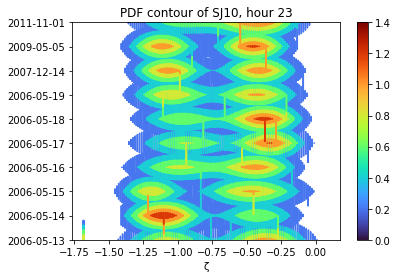

In [9]:
gmm.plot_contour(gmm_dict, x_min, x_max, cable_number, n_xp=5000)

In [13]:
for date in gmm_dict:
    gmm_df = gmm_dict[date]
    print(gmm_df.columns.tolist())
    print(gmm_df.iloc[:2, 2])
    break

['x', 'y', 'mean']
0   -1.080582
1     -0.3643
Name: mean, dtype: object


In [12]:
gmm_df

,x,y,mean
0,-1.680800,0.012376,-1.080582
1,-1.665156,0.015411,-0.3643
2,-1.649512,0.019081,NaN
3,-1.633868,0.023487,NaN
4,-1.618224,0.028744,NaN
...,...,...,...
114,0.102606,0.078292,NaN
115,0.118250,0.065489,NaN
116,0.133894,0.054458,NaN
117,0.149538,0.045020,NaN
